## Visualization for Ground Truth* and Predicted Trajectories

\* Shortest Path

### Instructions:
1. modified `3D/CheckConnectivity`
2. start a local server under directory `3D` by 
``` bash
# bash
cd preprocess/3D
python3 -m http.server```
3. make sure following paths are correct: 
``` python
# ground truth trajectory
trajectory_path = "tasks/R2R/results/val_seen_shortest_agent.json"  
# prediction trajectory
trajectory_path = "tasks/R2R/Nresults/seq2seq_sample_imagenet_val_seen_iter_16500.json"  
# instructions
instruction_path = "tasks/R2R/data/R2R_val_seen.json"
# connectivity information (where %s will be a scan ID)
graph_path = "connectivity/%s_connectivity.json"  
```
4. Never run the whole notebook together. You have to wait for `imgData= browser.execute_script...` to load images
5. After running the notebook, `./jolin_mesh_names.json` and `'./%s.json'% scan` will be genereated

In [9]:
import json, os

In [10]:
# Get all folders in mesh
folders = {}
with open("/home/krishna/Projects/VLN-BEVBert/datasets/R2R/connectivity/scans.txt") as txt:
    scans = txt.readlines()
for name in os.listdir("/mnt/Storage1/Krishna/datasets/matterport/v1/scans/"):
    if name == 'data':
        continue
    subfolder = os.listdir(f"/mnt/Storage1/Krishna/datasets/matterport/v1/scans/{name}/matterport_mesh/")
    folders[name]=subfolder[0]

In [11]:
def build_dicts(trajectory_path, instruction_path):
    with open(trajectory_path) as f:
        trajectory_data = json.load(f)
    with open(instruction_path) as f:
        instruction_data = json.load(f)

    instr_id2txt = {f"{d['path_id']}_{n}": txt for d in instruction_data for n, txt in enumerate(d['instructions'])}
    instr_id2scan = {f"{d['path_id']}_{n}": 
                     d['scan'] for d in instruction_data for n, txt in enumerate(d['instructions'])}
    scan2trajidx = {
        instr_id2scan[traj['instr_id']]:idx for idx, traj in enumerate(trajectory_data)}
    instr_id2trajidx = { traj['instr_id']:idx for idx, traj in enumerate(trajectory_data) }
    return trajectory_data, instruction_data, instr_id2txt, instr_id2scan, scan2trajidx, instr_id2trajidx

# Start a local server

`cd /home/xql/Source/Subgoal/preprocess/3D
python3 -m http.server 8001`

# Specify the trajectory ID

# Ground Truth

In [182]:
def traj2conn_json(graph_path, idx, trajectory_data):
    trajectory = trajectory_data[idx]
    instr_id = trajectory['instr_id']
    scan = instr_id2scan[instr_id]
    viewpointId2idx={}
    with open(graph_path % scan) as f:
        conn_data = json.load(f)
    for i,item in enumerate(conn_data):
        viewpointId2idx[item['image_id']]=i
    return trajectory, viewpointId2idx, conn_data

def gen_conns(trajectory, viewpointId2idx, conn_data):
    trajectory = trajectory_data[idx]
    node=conn_data[viewpointId2idx[trajectory['trajectory'][0][0]]]
    node={k:v for k,v in node.items()}
    node['unobstructed'] = [False]*len(trajectory['trajectory'])
    conns=[node]
    prev_viewpoint = node['image_id']
    trajectory = sum(trajectory['trajectory'][1:], [])
    for n, viewpoint in enumerate(trajectory):
        node=conn_data[viewpointId2idx[viewpoint]]
        node={k:v for k,v in node.items()}
        prev_viewpoint = conns[-1]['image_id']
        if viewpoint != prev_viewpoint:
#             assert node['unobstructed'][viewpointId2idx[prev_viewpoint]]
            node['unobstructed'] = [False]*len(trajectory)
            node['unobstructed'][len(conns)-1]=True
            conns.append(node)
    return conns

In [183]:
def idx2scan_folder(idx, trajectory_data):
    trajectory = trajectory_data[idx]
    instr_id = trajectory['instr_id']
    print(instr_id, trajectory)
    scan = instr_id2scan[instr_id]
    txt = instr_id2txt[instr_id]
    return [scan, folders[scan]]

In [466]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
from IPython.display import display, HTML
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.desired_capabilities import DesiredCapabilities

# enable browser logging
desired_capabilities = DesiredCapabilities.CHROME
desired_capabilities['loggingPrefs'] = { 'browser':'ALL' }

options = Options()
# options.add_argument('--headless=new')
options.add_argument("--window-size=1920,1080")
options.add_argument("--start-maximized")
options.add_argument("--disable-infobars")
options.add_argument("--disable-extensions")
options.add_argument("--disable-gpu")
options.add_argument("--disable-dev-shm-usage")
options.add_argument("--no-sandbox")
options.add_argument('--profile-directory=Default')
browser = webdriver.Chrome(options=options, desired_capabilities=desired_capabilities)
url = "http://10.18.65.188:8001/connectivity.html"

In [437]:
trajectory_path = "/home/krishna/Projects/VLN-BEVBert/snap_ft/r2r/mlm.5.sap.5.masksem.1.pert.1.neigh.80000.pc_lambda0.1.pc_teacher/preds/detail_val_unseen.json"

instruction_path = "/home/krishna/Projects/VLN-BEVBert/datasets/R2R/annotations/R2R_val_unseen_enc.json"

graph_path = "/home/krishna/Projects/VLN-BEVBert/datasets/R2R/connectivity/%s_connectivity.json"

trajectory_data, instruction_data, instr_id2txt, instr_id2scan, scan2trajidx, instr_id2trajidx \
= build_dicts(trajectory_path, instruction_path)


In [438]:
instr_id = '788_0' #'6843_1' #'2230_2' #'4668_2'  #"3356_0"

In [459]:

idxs= [instr_id2trajidx[instr_id]]
scan_folders = [idx2scan_folder(idx, trajectory_data) for idx in idxs]
print(scan_folders)
instr_id = trajectory_data[idxs[0]]['instr_id']
print(instr_id)

# show instructions

instruction = instr_id2txt[instr_id]
# print(instruction)
print('')
for i in ['0','1','2']:
    print(instr_id2txt[instr_id[:-1]+i])

788_0 {'details': {'3321d3b4158a4b8093b724c1dd8e38d5': {'stop_prob': 0.007884792052209377}, '747f76b8196d4de28339e240992a0ee1': {'stop_prob': 0.00014383716916199774}, '8bc71dc82b1e4488a2cfc4398cb6905e': {'stop_prob': 9.909610980685102e-07}, '8e0f17d81fbc4859beb25117e6880973': {'stop_prob': 1.1544005246832967e-05}, 'd4d123f647ad482c9df6d07474c29895': {'stop_prob': 3.64593906851951e-05}, 'da59b98bb29247e69790fcaf32e13bb4': {'stop_prob': 0.7479006052017212}, 'f61c2574329f4586b3bae88643df8b8a': {'stop_prob': 4.24277204729151e-05}, 'fc4189783106499da4e9dd0a20636c4e': {'stop_prob': 2.5197905983986857e-07}}, 'instr_id': '788_0', 'trajectory': [['fc4189783106499da4e9dd0a20636c4e'], ['d4d123f647ad482c9df6d07474c29895'], ['747f76b8196d4de28339e240992a0ee1'], ['8bc71dc82b1e4488a2cfc4398cb6905e'], ['f61c2574329f4586b3bae88643df8b8a'], ['8e0f17d81fbc4859beb25117e6880973'], ['3321d3b4158a4b8093b724c1dd8e38d5'], ['da59b98bb29247e69790fcaf32e13bb4']]}
[['QUCTc6BB5sX', '0685d2c5313948bd94e920b5b9e1a7b2

### Dump connections

In [471]:
scan_folders = [idx2scan_folder(idx, trajectory_data) for idx in idxs]

with open('./jolin_mesh_names.json', 'w') as fp:
    json.dump(scan_folders, fp)

for idx, (scan, folder) in zip(idxs, scan_folders):
    with open('./%s.json'% scan, 'w') as fp:
        trajectory, viewpointId2idx, conn_data=traj2conn_json(graph_path, idx, trajectory_data)
        json.dump(gen_conns(trajectory, viewpointId2idx, conn_data), fp)

browser.get(url) #navigate to the page
browser.save_screenshot("screenshot.png")
WebDriverWait(browser,10).until(lambda x: browser.execute_script("return document.readyState")== "complete")
# WebDriverWait(browser,10).until(EC.element_to_be_clickable( (By.ID, 'download-btn') )).click()
# og= browser.manage().logs().get("browser")

788_0 {'details': {'3321d3b4158a4b8093b724c1dd8e38d5': {'stop_prob': 0.007884792052209377}, '747f76b8196d4de28339e240992a0ee1': {'stop_prob': 0.00014383716916199774}, '8bc71dc82b1e4488a2cfc4398cb6905e': {'stop_prob': 9.909610980685102e-07}, '8e0f17d81fbc4859beb25117e6880973': {'stop_prob': 1.1544005246832967e-05}, 'd4d123f647ad482c9df6d07474c29895': {'stop_prob': 3.64593906851951e-05}, 'da59b98bb29247e69790fcaf32e13bb4': {'stop_prob': 0.7479006052017212}, 'f61c2574329f4586b3bae88643df8b8a': {'stop_prob': 4.24277204729151e-05}, 'fc4189783106499da4e9dd0a20636c4e': {'stop_prob': 2.5197905983986857e-07}}, 'instr_id': '788_0', 'trajectory': [['fc4189783106499da4e9dd0a20636c4e'], ['d4d123f647ad482c9df6d07474c29895'], ['747f76b8196d4de28339e240992a0ee1'], ['8bc71dc82b1e4488a2cfc4398cb6905e'], ['f61c2574329f4586b3bae88643df8b8a'], ['8e0f17d81fbc4859beb25117e6880973'], ['3321d3b4158a4b8093b724c1dd8e38d5'], ['da59b98bb29247e69790fcaf32e13bb4']]}


True


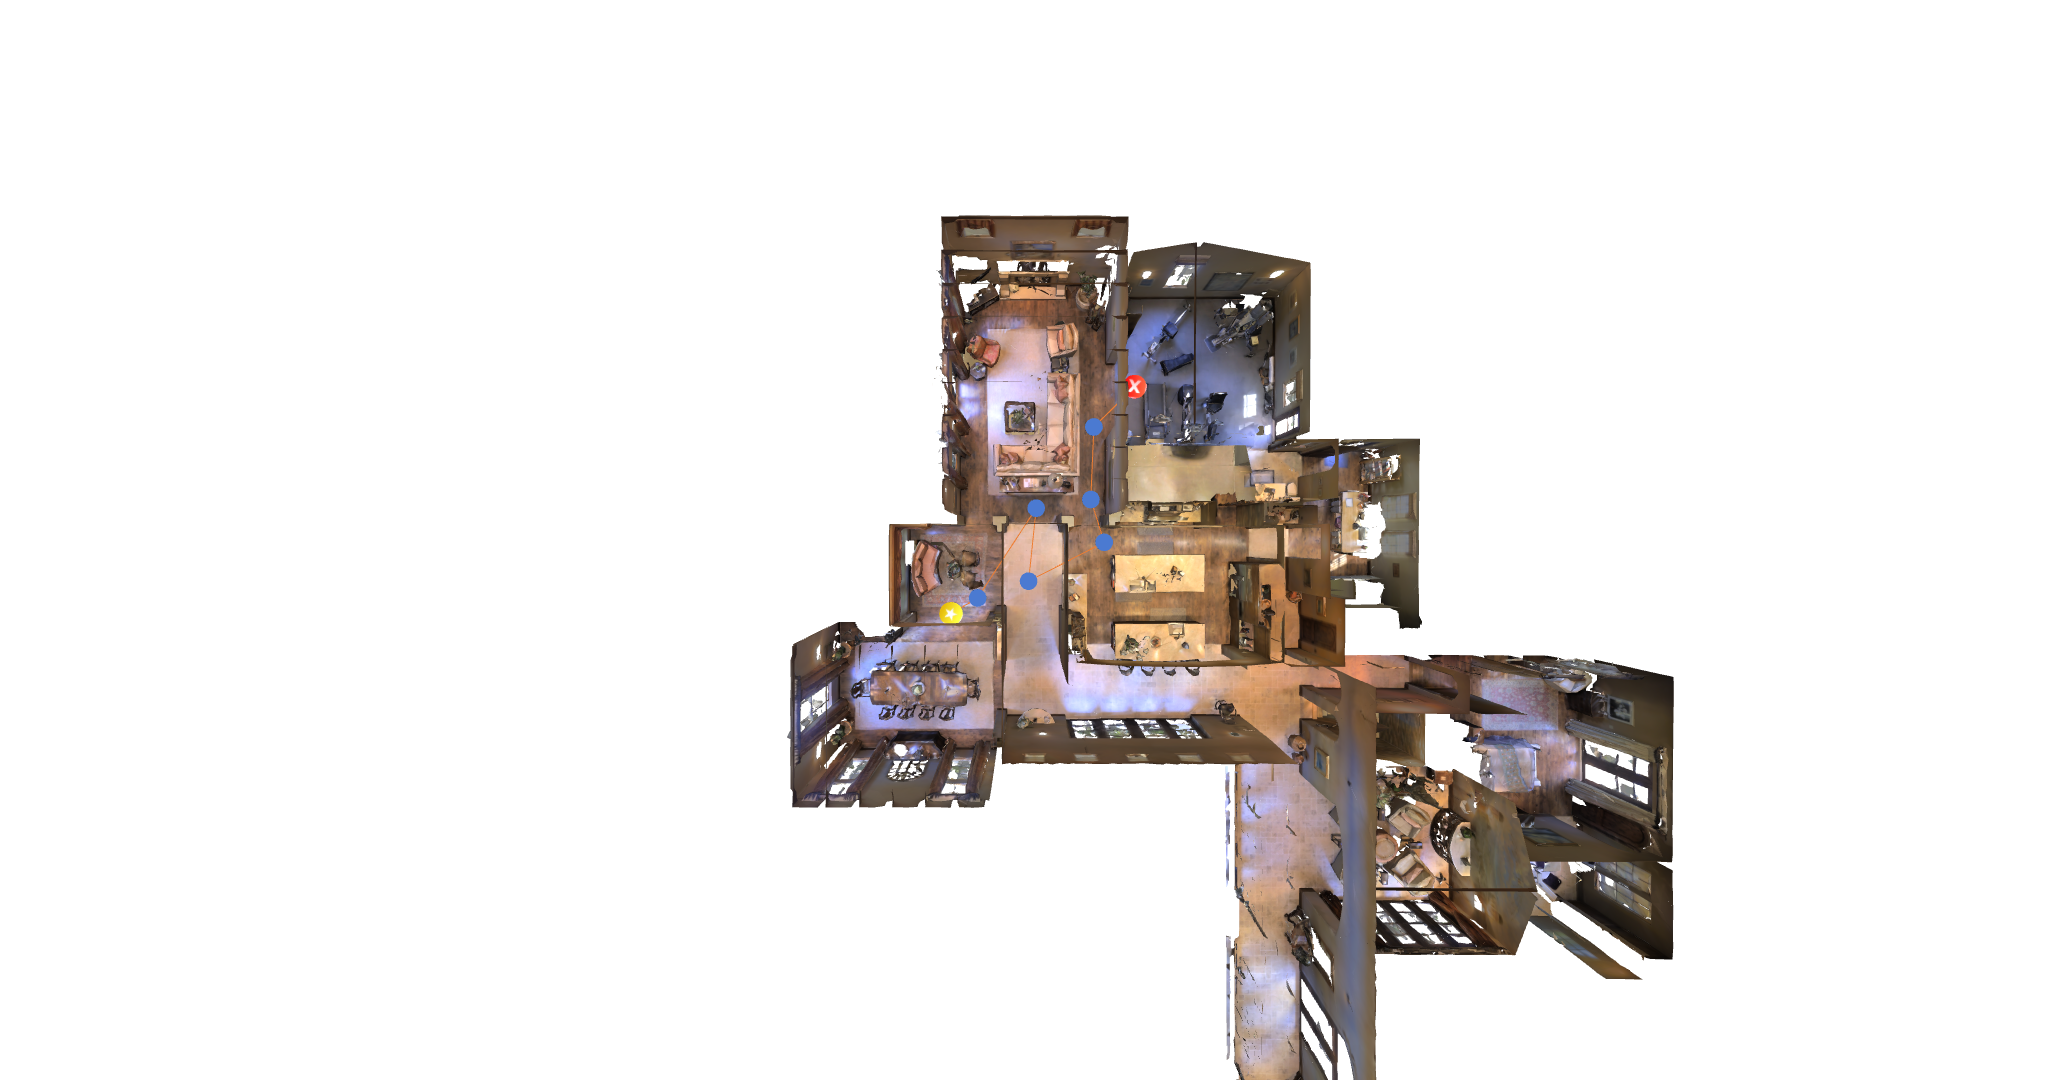

In [472]:
imgData= browser.execute_script('return renderer.domElement.toDataURL().replace("image/png", "image/octet-stream")')
display(HTML('''<img src="%s">'''%(imgData)))

In [ ]:
# Predication1
trajectory_path = "/home/xql/Source/Subgoal/tasks/R2R/exps/Nresult-len8-bi-mean/seq2seq_sample_imagenet_val_unseen_iter_36000.json"

trajectory_data, instruction_data, instr_id2txt, instr_id2scan, scan2trajidx, instr_id2trajidx \
= build_dicts(trajectory_path, instruction_path)

idxs= [instr_id2trajidx[instr_id]]
print(instr_id2txt[instr_id])

### Dump connections

scan_folders = [idx2scan_folder(idx, trajectory_data) for idx in idxs]

with open('./jolin_mesh_names.json', 'w') as fp:
    json.dump(scan_folders, fp)

for idx, (scan, folder) in zip(idxs, scan_folders):
    with open('./%s.json'% scan, 'w') as fp:
        trajectory, viewpointId2idx, conn_data=traj2conn_json(graph_path, idx, trajectory_data)
        json.dump(gen_conns(trajectory, viewpointId2idx, conn_data), fp)

browser.get(url) #navigate to the page

In [ ]:
imgData= browser.execute_script('return renderer.domElement.toDataURL().replace("image/png", "image/octet-stream")')
display(HTML('''<img src="%s">'''%(imgData)))

In [ ]:
# Predication2

trajectory_path = "/home/nav/Source/speaker_follower/tasks/R2R/eval_outputs/pragmatics_val_unseen_speaker_weight_0.00.json"

trajectory_data, instruction_data, instr_id2txt, instr_id2scan, scan2trajidx, instr_id2trajidx \
= build_dicts(trajectory_path, instruction_path)

idxs= [instr_id2trajidx[instr_id]]
print(instr_id2txt[instr_id])

### Dump connections

scan_folders = [idx2scan_folder(idx, trajectory_data) for idx in idxs]

with open('./jolin_mesh_names.json', 'w') as fp:
    json.dump(scan_folders, fp)

for idx, (scan, folder) in zip(idxs, scan_folders):
    with open('./%s.json'% scan, 'w') as fp:
        trajectory, viewpointId2idx, conn_data=traj2conn_json(graph_path, idx, trajectory_data)
        json.dump(gen_conns(trajectory, viewpointId2idx, conn_data), fp)

browser.get(url) #navigate to the page

In [ ]:
imgData= browser.execute_script('return renderer.domElement.toDataURL().replace("image/png", "image/octet-stream")')
display(HTML('''<img src="%s">'''%(imgData)))

In [ ]:
# Predication3

trajectory_path = "/home/xql/Source/Subgoal/tasks/R2R/exps/baseline/seq2seq_sample_imagenet_val_unseen_iter_13100.json"

trajectory_data, instruction_data, instr_id2txt, instr_id2scan, scan2trajidx, instr_id2trajidx \
= build_dicts(trajectory_path, instruction_path)

idxs= [instr_id2trajidx[instr_id]]
print(instr_id2txt[instr_id])

### Dump connections

scan_folders = [idx2scan_folder(idx, trajectory_data) for idx in idxs]

with open('./jolin_mesh_names.json', 'w') as fp:
    json.dump(scan_folders, fp)

for idx, (scan, folder) in zip(idxs, scan_folders):
    with open('./%s.json'% scan, 'w') as fp:
        trajectory, viewpointId2idx, conn_data=traj2conn_json(graph_path, idx, trajectory_data)
        json.dump(gen_conns(trajectory, viewpointId2idx, conn_data), fp)

browser.get(url) #navigate to the page

In [ ]:
imgData= browser.execute_script('return renderer.domElement.toDataURL().replace("image/png", "image/octet-stream")')
display(HTML('''<img src="%s">'''%(imgData)))

In [121]:
trans_prob = lambda s, a: 0.5 

In [122]:
act = {
    'a1': 1,
    'a2': 2,
    'a3'
}
gamma = 0.5
V_k =[1, 0, 0, 0, 0, 0, 10]

def reward_fn(s):
    r = 0
    if s == 1:
        return 1
    elif s == 7:
        return 10

def policy(s):
    return a1